In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")





In [9]:
campaign_df= pd.read_csv(r"C:\Users\vanda\Downloads\email_campaign_dataset.csv")
campaign_df.head(5)


,Customer_ID,Age,Gender,Location,Total_Purchases,Last_Purchase_Date,Average_Order_Value,Pages_Visited,Last_Browsing_Date,Email_Opens,...,Email_Click_Date,Email_Subject_Line,Email_Content_Type,Email_Send_Time,Conversion,Response_Time_Hours,Click_Through_Rate,Conversion_Rate,Bounce_Rate,Unsubscribe_Rate
0,CUST_1,22,Female,UK,14,6/13/2024 13:00,482.94,26,9/1/2024 18:06,18,...,NaN,Exclusive Discount,Discount,16:11,True,46.16,0.91,0.10,0.04,0.01
1,CUST_2,53,Male,UK,11,NaN,110.22,19,NaN,15,...,NaN,Exclusive Discount,Discount,12:35,True,8.78,0.37,0.49,0.05,0.01
2,CUST_3,32,Female,Canada,15,8/26/2024 21:10,212.81,28,5/19/2024 8:54,14,...,NaN,New Arrivals,Discount,23:25,False,39.81,0.85,0.30,0.06,0.02
3,CUST_4,32,Female,UK,17,8/19/2024 9:14,84.84,45,5/26/2024 20:44,4,...,NaN,Exclusive Discount,New Products,11:45,False,37.39,0.53,0.15,0.09,0.03
4,CUST_5,23,Female,Canada,28,8/30/2024 8:09,375.88,19,8/1/2024 22:11,13,...,8/2/2024 10:56,Product Tips,New Products,17:13,False,13.00,0.31,0.09,0.00,0.01


EDA process



In [11]:
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          10000 non-null  object 
 1   Age                  10000 non-null  int64  
 2   Gender               10000 non-null  object 
 3   Location             10000 non-null  object 
 4   Total_Purchases      10000 non-null  int64  
 5   Last_Purchase_Date   8000 non-null   object 
 6   Average_Order_Value  10000 non-null  float64
 7   Pages_Visited        10000 non-null  int64  
 8   Last_Browsing_Date   8981 non-null   object 
 9   Email_Opens          10000 non-null  int64  
 10  Email_Clicks         10000 non-null  int64  
 11  Unsubscribed         10000 non-null  bool   
 12  A/B_Test_Group       10000 non-null  object 
 13  Email_Send_Date      10000 non-null  object 
 14  Email_Open_Date      6964 non-null   object 
 15  Email_Click_Date     5008 non-null   

In [13]:
campaign_df.isnull().sum()

Customer_ID               0
Age                       0
Gender                    0
Location                  0
Total_Purchases           0
Last_Purchase_Date     2000
Average_Order_Value       0
Pages_Visited             0
Last_Browsing_Date     1019
Email_Opens               0
Email_Clicks              0
Unsubscribed              0
A/B_Test_Group            0
Email_Send_Date           0
Email_Open_Date        3036
Email_Click_Date       4992
Email_Subject_Line        0
Email_Content_Type        0
Email_Send_Time           0
Conversion                0
Response_Time_Hours       0
Click_Through_Rate        0
Conversion_Rate           0
Bounce_Rate               0
Unsubscribe_Rate          0
dtype: int64

In [21]:
Missing_value_column=['Last_Purchase_Date','Email_Click_Date','Email_Open_Date','Last_Browsing_Date']
for column in Missing_value_column:
    campaign_df[column] = pd.to_datetime(campaign_df[column],format='%Y-%m-%d', errors='coerce')
campaign_df['Last_Purchase_Date'].fillna('No Purchase', inplace=True)
campaign_df['Email_Click_Date'].fillna('No Click', inplace=True)
campaign_df['Email_Open_Date'].fillna('No Open Email', inplace=True)
campaign_df['Last_Browsing_Date'].fillna('No Browsing', inplace=True)
campaign_df.drop_duplicates(subset=['Customer_ID'], inplace=True)
missing_data= campaign_df.isnull().sum()
data_types = campaign_df.dtypes
data_types, missing_data



(Customer_ID             object
 Age                      int64
 Gender                  object
 Location                object
 Total_Purchases          int64
 Last_Purchase_Date      object
 Average_Order_Value    float64
 Pages_Visited            int64
 Last_Browsing_Date      object
 Email_Opens              int64
 Email_Clicks             int64
 Unsubscribed              bool
 A/B_Test_Group          object
 Email_Send_Date         object
 Email_Open_Date         object
 Email_Click_Date        object
 Email_Subject_Line      object
 Email_Content_Type      object
 Email_Send_Time         object
 Conversion                bool
 Response_Time_Hours    float64
 Click_Through_Rate     float64
 Conversion_Rate        float64
 Bounce_Rate            float64
 Unsubscribe_Rate       float64
 dtype: object,
 Customer_ID            0
 Age                    0
 Gender                 0
 Location               0
 Total_Purchases        0
 Last_Purchase_Date     0
 Average_Order_Value    0
 P

,Age,Total_Purchases,Average_Order_Value,Pages_Visited,Email_Opens,Email_Clicks,Response_Time_Hours,Click_Through_Rate,Conversion_Rate,Bounce_Rate,Unsubscribe_Rate
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,43.608800,24.526700,255.763765,24.738500,9.553100,4.527700,24.011625,0.500590,0.248241,0.049813,0.024927
std,15.040531,14.481998,142.148805,14.205362,5.746989,2.846339,13.687041,0.290088,0.145385,0.029242,0.015094
min,18.000000,0.000000,10.020000,1.000000,0.000000,0.000000,0.510000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,12.000000,131.982500,12.000000,5.000000,2.000000,12.300000,0.250000,0.120000,0.020000,0.010000
50%,44.000000,25.000000,256.465000,25.000000,10.000000,5.000000,23.730000,0.510000,0.250000,0.050000,0.030000
75%,57.000000,37.000000,378.642500,37.000000,15.000000,7.000000,35.860000,0.750000,0.380000,0.080000,0.040000
max,69.000000,49.000000,499.950000,49.000000,19.000000,9.000000,48.000000,1.000000,0.500000,0.100000,0.050000


<Figure size 1400x1000 with 0 Axes>

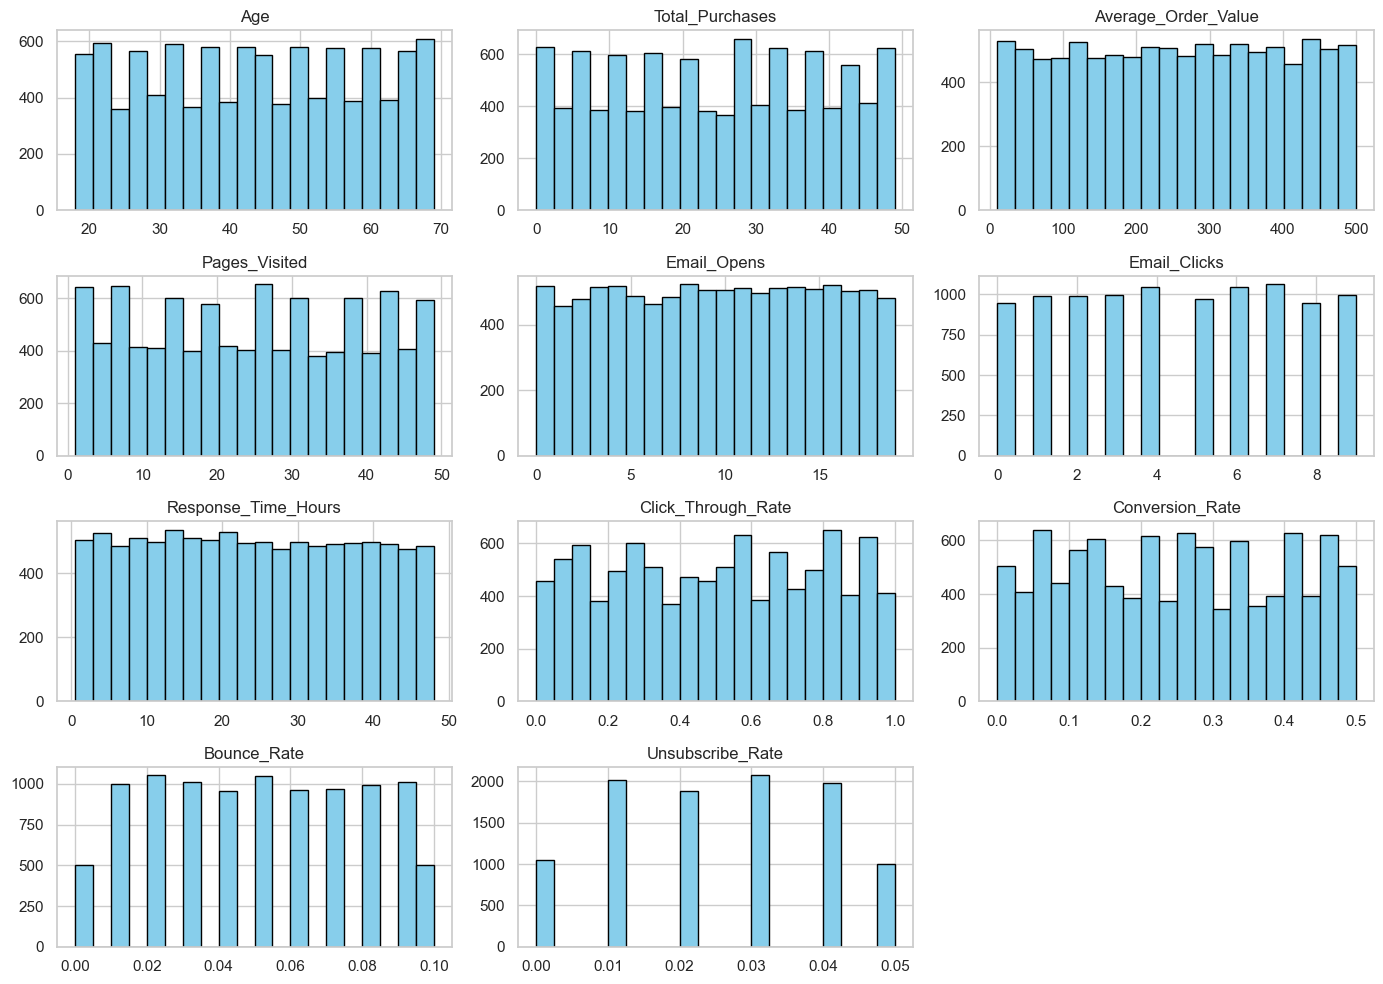

In [23]:
# create a table showing statistical index
sns.set(style="whitegrid")
summary_stats = campaign_df.describe()
# Distribution of numerical variables - histograms
numerical_columns = ['Age', 'Total_Purchases', 'Average_Order_Value', 
                     'Pages_Visited', 'Email_Opens', 'Email_Clicks', 
                     'Response_Time_Hours', 'Click_Through_Rate', 
                     'Conversion_Rate', 'Bounce_Rate', 'Unsubscribe_Rate']
# Plot histograms for the numerical columns
plt.figure(figsize=(14,10))
campaign_df[numerical_columns].hist(bins=20, figsize=(14, 10), layout=(4,3), color='skyblue', edgecolor='black')
plt.tight_layout()
summary_stats

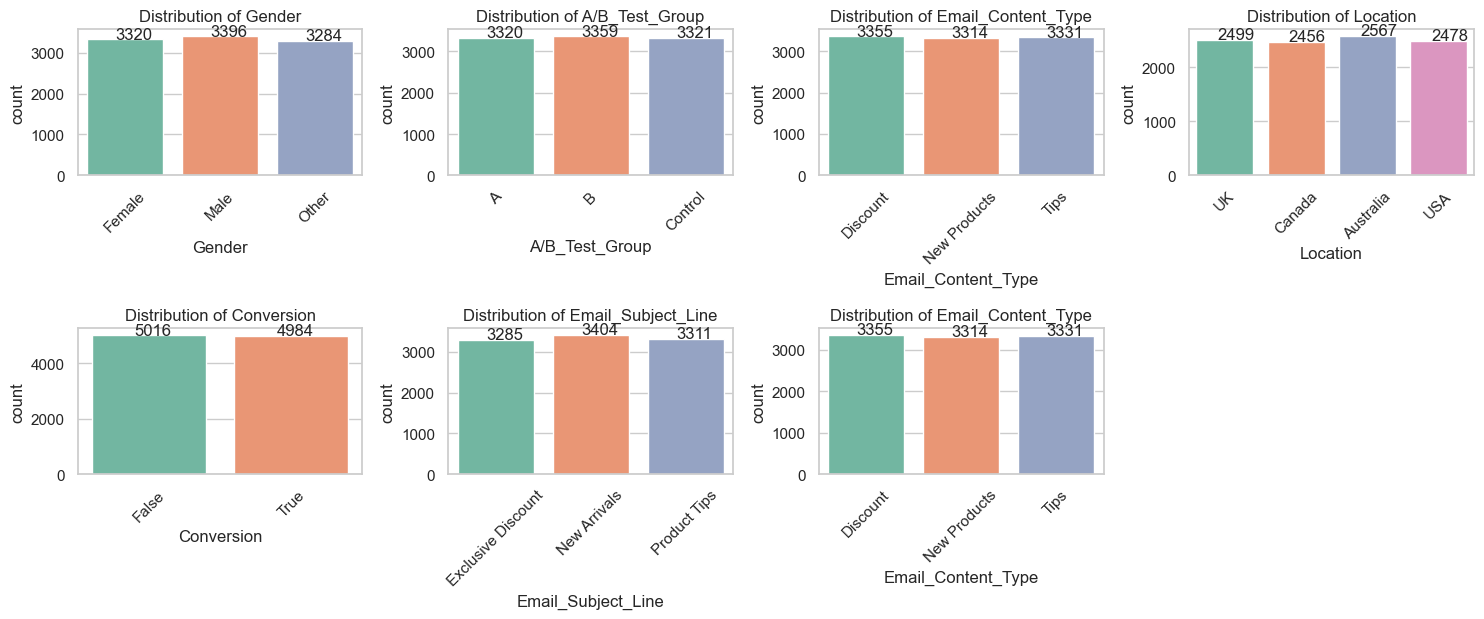

In [25]:
# Frequency distribution of categorical variables
categorical_columns = ['Gender', 'A/B_Test_Group', 'Email_Content_Type','Location','Conversion','Email_Subject_Line','Email_Content_Type']

# Plot bar charts for categorical columns
plt.figure(figsize=(15,8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 4, i)
     # Create the countplot
    ax = sns.countplot(data=campaign_df, x=col, palette='Set2')
    
    # Rotate x-axis labels for readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    # Add data labels on top of bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + 0.3, p.get_height() + 20))
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()

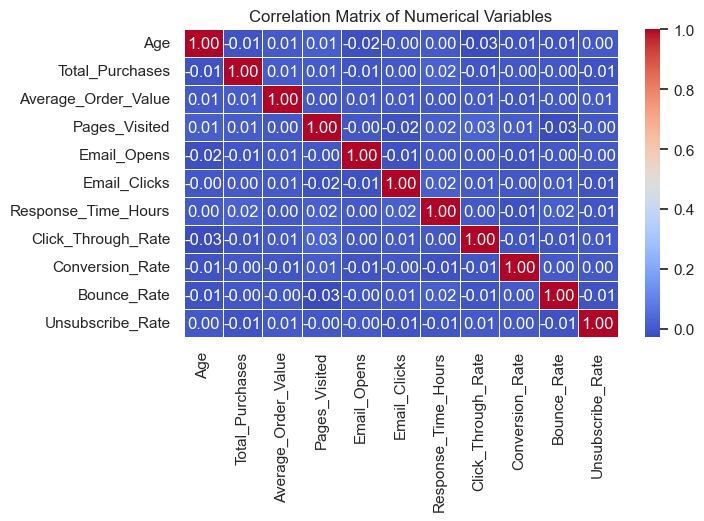

In [27]:
# Correlation Matrix
# Select only numeric columns from the DataFrame
numeric_campaign_df = campaign_df.select_dtypes(include=['number'])
correlation_matrix = numeric_campaign_df.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Identify the outliter

In [29]:
# Create a function which indentify  the outlier for dataset
def indentify_outlier(campaign_df,column):
    Q1 = campaign_df[column].quantile(0.25)
    Q3 = campaign_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return campaign_df[(campaign_df[column] < lower_bound) | (campaign_df[column] > upper_bound)]

In [31]:
# Apply to relevant numerical columns
outliers_age = indentify_outlier(campaign_df,'Age')
outliers_total_purchases = indentify_outlier(campaign_df,'Total_Purchases')
outliers_average_order_value = indentify_outlier(campaign_df,'Average_Order_Value')
outliers_response_time_hours = indentify_outlier(campaign_df,'Response_Time_Hours')
outliers_click_through_rate = indentify_outlier(campaign_df,'Click_Through_Rate')
outliers_bounce_rate = indentify_outlier(campaign_df,'Bounce_Rate')
outliers_unsubcribe_rate = indentify_outlier(campaign_df,'Unsubscribe_Rate')
outliers_conversion_rate = indentify_outlier(campaign_df,'Conversion_Rate')
outliers_page_visited = indentify_outlier(campaign_df,'Pages_Visited')
outliers_email_opens = indentify_outlier(campaign_df,'Email_Opens')
outliers_email_clicks = indentify_outlier(campaign_df,'Email_Clicks')   
# Check the number of outliers
print("outliers in Age:", outliers_age.shape[0])
print("outliers in Total Purchases:", outliers_total_purchases.shape[0])
print("outliers in Average Order Value:", outliers_average_order_value.shape[0])
print("outliers_response_time_hours:", outliers_response_time_hours.shape[0])
print("outliers_click_through_rate:", outliers_click_through_rate.shape[0])
print("outliers_bounce_rate:", outliers_bounce_rate.shape[0])
print("outliers_unsubcribe_rate:", outliers_unsubcribe_rate.shape[0])
print("outliers_conversion_rate:", outliers_conversion_rate.shape[0])
print("outliers_page_visited:", outliers_page_visited.shape[0])
print("outliers_email_opens:", outliers_email_opens.shape[0])
print("outliers_email_clicks:", outliers_email_clicks.shape[0])

                      
                      
                                           
                     

outliers in Age: 0
outliers in Total Purchases: 0
outliers in Average Order Value: 0
outliers_response_time_hours: 0
outliers_click_through_rate: 0
outliers_bounce_rate: 0
outliers_unsubcribe_rate: 0
outliers_conversion_rate: 0
outliers_page_visited: 0
outliers_email_opens: 0
outliers_email_clicks: 0


CUSTOMER SEGMENTATION ANALYSIS

In [105]:
#import libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.manifold import TSNE

In [107]:
features = ['Age', 'Average_Order_Value', 'Conversion_Rate','Pages_Visited']
X = data[features]
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
# Hierarchical clustering
hc = AgglomerativeClustering(n_clusters=5)
hc_labels = hc.fit_predict(X_scaled)

Text(0.5, 1.0, 'PCA with DBSCAN Clusters')

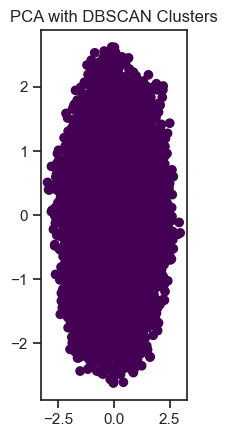

In [117]:
# PCA plot
plt.subplot(131)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('PCA with DBSCAN Clusters')

Text(0.5, 1.0, 't-SNE with Hierarchical Clusters')

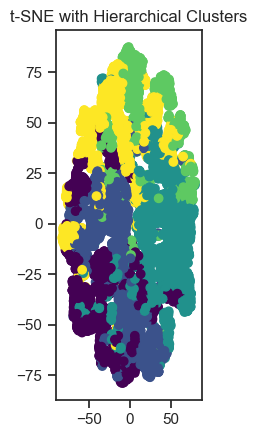

In [111]:
# t-SNE plot
plt.subplot(132)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=hc_labels, cmap='viridis')
plt.title('t-SNE with Hierarchical Clusters')

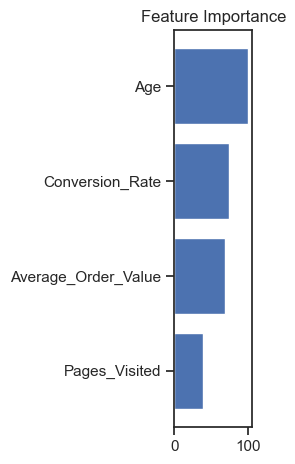

In [119]:
# Feature importance
plt.subplot(133)
feature_importance = abs(pca.components_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(features)[sorted_idx])
plt.title('Feature Importance')

plt.tight_layout()
plt.show()



DBSCAN Clustering Results:
             Age  Average_Order_Value  Conversion_Rate  Pages_Visited
Cluster                                                              
0        43.6088           255.763765         0.248241        24.7385


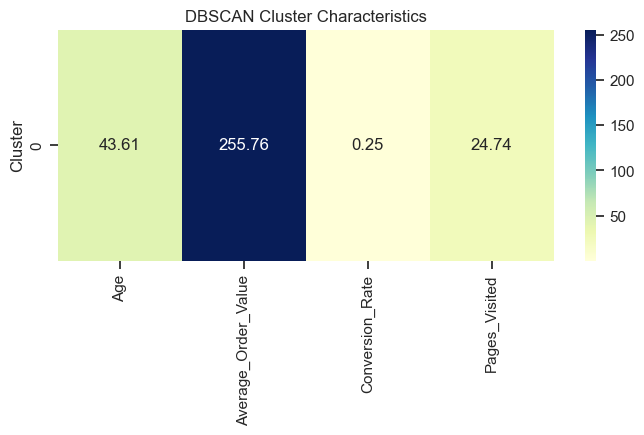


Hierarchical Clustering Results:
               Age  Average_Order_Value  Conversion_Rate  Pages_Visited
Cluster                                                                
0        34.260646           267.063263         0.384972      30.790149
1        55.030247           281.115151         0.382603      21.714940
2        43.106454           233.758516         0.138490      36.528932
3        44.758697           388.704996         0.142043      14.248705
4        39.821076           147.302239         0.182212      12.217892


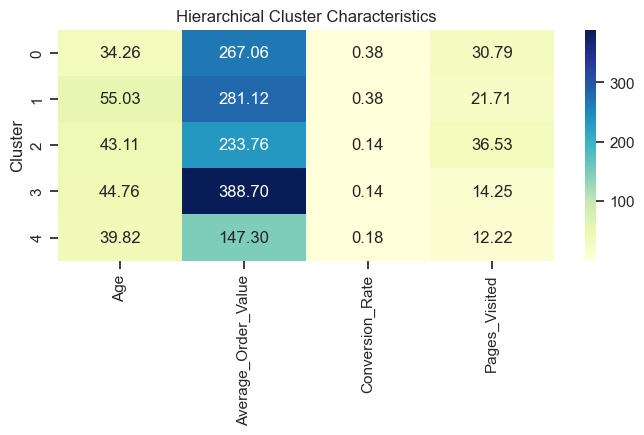

In [121]:
# Analyze clusters
for method, labels in [('DBSCAN', dbscan_labels), ('Hierarchical', hc_labels)]:
    print(f"\n{method} Clustering Results:")
    data['Cluster'] = labels
    cluster_stats = data.groupby('Cluster')[features].mean()
    print(cluster_stats)
    
    # Visualization of cluster characteristics
    plt.figure(figsize=(8, 3))
    sns.heatmap(cluster_stats, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title(f'{method} Cluster Characteristics')
    plt.show()

Cluster 0:
Younger customers (34.26 years)
High average order value ($267.06)
High conversion rate (0.38 or 38%)
High number of pages visited (30.79)

Cluster 1:
Oldest customers (55.03 years)
High average order value ($281.12)
High conversion rate (0.38 or 38%)
Fewer pages visited (21.71)

Cluster 2:
Middle-aged customers (43.11 years)
Moderate average order value ($233.76)
Low conversion rate (0.14 or 14%)
Highest number of pages visited (36.53)

Cluster 3:
Middle-aged customers (44.76 years)
Highest average order value ($388.70)
Low conversion rate (0.14 or 14%)
Low number of pages visited (14.25)

Cluster 4:
Younger customers (39.82 years)
Lowest average order value ($147.30)
Moderate conversion rate (0.18 or 18%)
Lowest number of pages visited (12.22)

Recommendations:

1.Focus on the results for potential customer segmentation strategies.

2.Consider tailoring marketing approaches for each cluster:
    High-value, efficient buyers (Cluster 3)
    Older, high-value customers (Cluster 1)
    Younger, high-engagement customers (Cluster 0)
    Budget-conscious browsers (Cluster 2)
    Lower-value, low-engagement group (Cluster 4)

3.Investigate why some groups have high page visits but low conversion rates (Cluster 2).

4.Use these insights to optimize website design, product recommendations, and marketing campaigns for each segment.